<a href="https://colab.research.google.com/github/diego-andrade279/Aula-de-deploy-de-modelos-de-machine-learning-usando-streamlit/blob/main/Explicabilidade_aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sobre os dados

Este conjunto de dados é sobre a evasão de clientes de uma empresa de telefonia. Abaixo temos o dicionário de dados.

**state** - Código de 2 letras do estado americado de residencia do cliente

**account length** - numero de meses que o cliente está com o provedor de telecomunicações

area code - codigo de área

**international plan** - Se cliente possui plano internacional sim ou não

**voice mail plan** - Se o cliente tem plano de correio de voz sim ou não

**number vmail messages** - Numero de mensagem de correio de voz

total day minutes - total de minutos das chamadas diarias

total day calls - numeros total de chamadas diarias

total day charge - cobrança total das chamadas por dia

total eve minutes - total de minutos de chamadas noturnas

total eve calls - total de chamadas noturnas

total eve charge - cobrança total das chamadas noturna

total night minutes - total de minutos de chamadas noturnas

total night calls - Numero total de chamadas noturnas

total night charge - cobrança total das chamadas noturnas

total intl minutes - total de minutos para chamadas 
internacionais

total intl calls - total de chamadas internacionais

total intl charge - cobrança total de chamadas internacionais

number customer service calls - numero de ligações para atendimento ao cliente

Churn - Evasão de clientes, sim ou não


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregar os datasets
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 

auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Baixa os dados de treinamento
link = 'https://drive.google.com/file/d/1ZKlBY8bnfCcg4sV2oexCw8hyf7mylf99/view?usp=sharing'
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('churn_train.csv')
df = pd.read_csv('churn_train.csv')
df.shape

(4250, 20)

##### Análise Exploratória

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


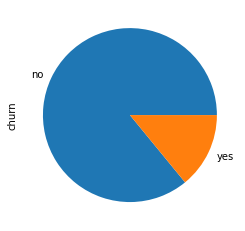

In [ ]:
df.churn.value_counts().plot(kind='pie')

In [ ]:
churn_y = df.loc[df.churn == 'yes', 'churn'].count()
churn_n = df.loc[df.churn == 'no', 'churn'].count()
churn_total = churn_y+churn_n
print('Quantidade total de clientes ' +str(churn_total))
print('Quantidade de clientes com churn ' +str(churn_y) + ' que representa ' + str(round(100*churn_y/churn_total,0)) + '% da base de clientes')
print('Quantidade de clientes sem churn ' +str(churn_n) + ' que representa ' + str(round(100*churn_n/churn_total,0)) + '% da base de clientes')

Quantidade total de clientes 4250
Quantidade de clientes com churn 598 que representa 14.0% da base de clientes
Quantidade de clientes sem churn 3652 que representa 86.0% da base de clientes


In [ ]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

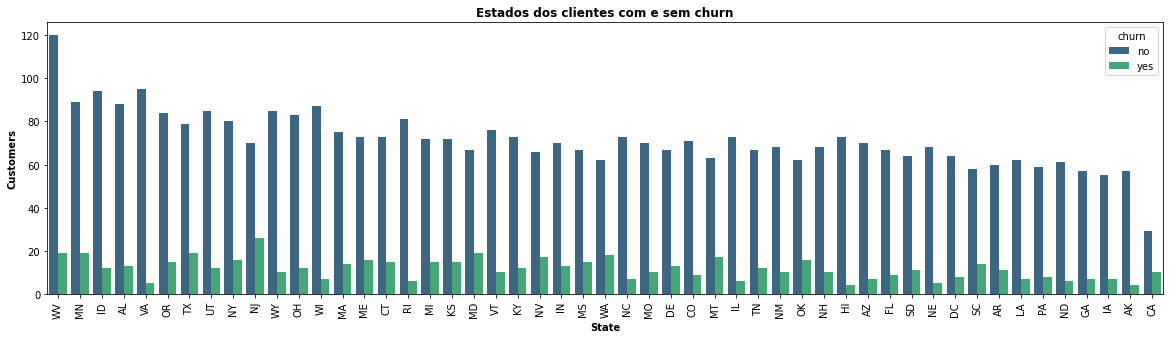

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(data = df, x='state', order=df['state'].value_counts().index, palette='viridis', hue='churn')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=10, fontweight='bold')
plt.ylabel('Customers', fontsize=10, fontweight='bold')
plt.title('Estados dos clientes com e sem churn', fontsize=12, fontweight='bold')
plt.show()

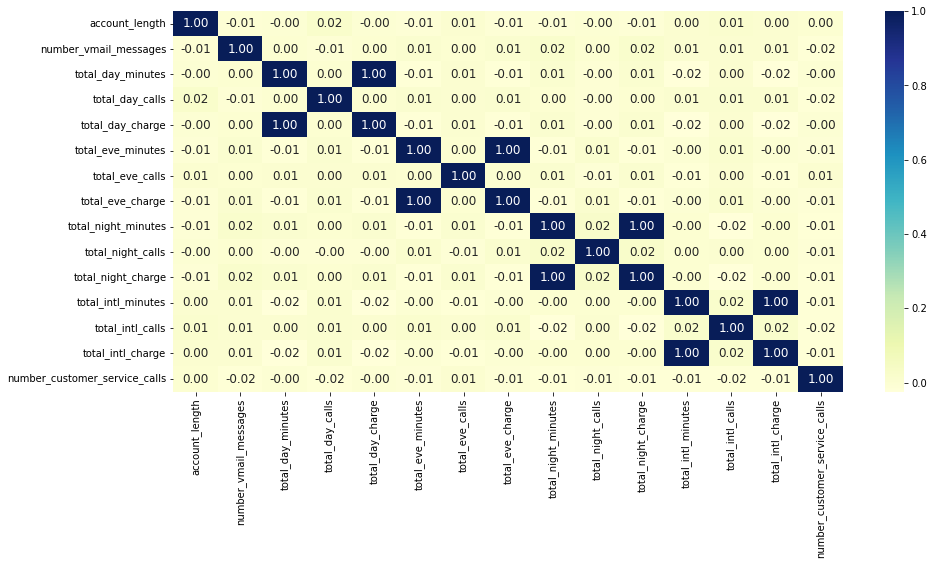

In [ ]:
# Correlação entre as variáveis 
corr = df.corr()
fig2, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, cmap='YlGnBu', annot_kws={'size': 12}, fmt='.2f')

#### Feature Engineering

In [ ]:
df['churn'] = df['churn'].astype('category')
df['churn'] = df['churn'].cat.codes

In [ ]:
df['voice_mail_plan'] = df['voice_mail_plan'].astype('category')
df['voice_mail_plan'] = df['voice_mail_plan'].cat.codes

In [ ]:
df['international_plan'] = df['international_plan'].astype('category')
df['international_plan'] = df['international_plan'].cat.codes

In [ ]:
df = pd.get_dummies(df, columns=['area_code'])

In [ ]:
df['state'] = df['state'].astype('category')
df['state'] = df['state'].cat.codes

#### Treinamento do modelo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import seaborn as sns 
import warnings 

In [ ]:
# Separando variáveis independentes e dependente
X = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=987)

In [ ]:
# Modelo XGBoost
xgb_model = XGBClassifier(max_depth=10, 
                          learning_rate=0.1,
                          n_estimators=300, 
                          silent=True,
                          objective='binary:logistic',
                          nthread=-1,
                          missing=np.nan,
                          subsample=0.9, 
                          colsample_bytree=0.9, 
                          base_score=0.5, 
                          seed=142)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.9, max_depth=10, n_estimators=300, nthread=-1,
              seed=142, silent=True, subsample=0.9)

In [ ]:
prob = xgb_model.predict_proba(X_test)[:,1]
pred = xgb_model.predict(X_test)

In [ ]:
# Salvando modelo treinado usando Joblib, ############# NÃO ESQUEÇAM DE MUDAR O CAMINHO PARA O SEU DRIVE ##########
import joblib 

joblib.dump(xgb_model, '/content/drive/MyDrive/CVS_PROJETO/xgb_model_churn.pkl')

['/content/drive/MyDrive/CVS_PROJETO/xgb_model_churn.pkl']

In [ ]:
print('AUC: '+str(metrics.roc_auc_score(y_test, prob)))
print('Accuracy : '+str(metrics.accuracy_score(y_test, pred)))
print('Recall : '+str(metrics.recall_score(y_test, pred)))
print('F1-Measure : '+str(metrics.f1_score(y_test, pred)))

AUC: 0.918790391973783
Accuracy : 0.9552941176470588
Recall : 0.7401960784313726
F1-Measure : 0.8412256267409471


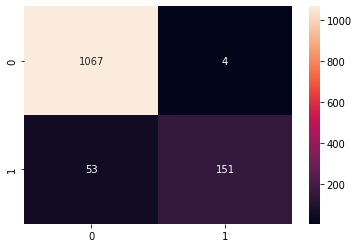

In [ ]:
cm = confusion_matrix(y_test, xgb_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')

#### Seleção de features

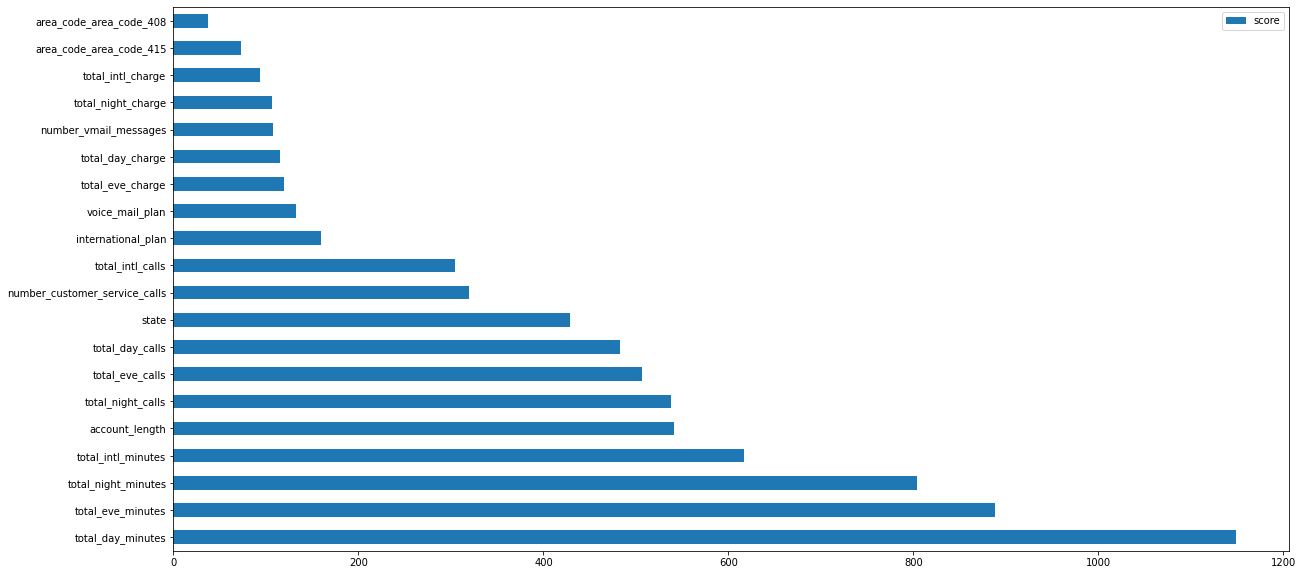

In [ ]:
# Feature Importance 
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by = 'score', ascending=True)
data.nlargest(20, columns='score').plot(kind='barh', figsize = (20,10))

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
select_feature = SelectKBest(chi2, k=5).fit(X_test, y_test)
a = select_feature.scores_
b = X_train.columns
df2 = pd.DataFrame(list(zip(b, a)), columns=['Column', 'Score'])

df2['Score'] = df2['Score'].replace(np.nan, 0)
df2['Score'] = df2['Score'].astype(int)
df2.sort_values(by='Score', ascending=False)

,Column,Score
5,total_day_minutes,1519
4,number_vmail_messages,367
7,total_day_charge,258
17,number_customer_service_calls,83
8,total_eve_minutes,55
2,international_plan,44
0,state,31
11,total_night_minutes,19
6,total_day_calls,13
3,voice_mail_plan,12


#### Explicabilidade

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.0 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

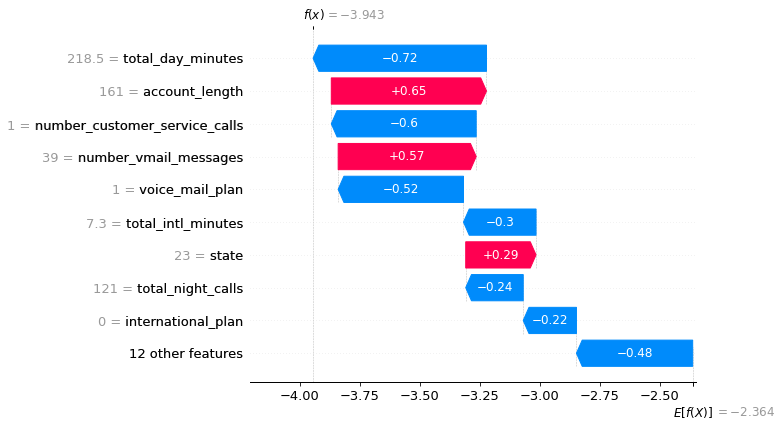

In [ ]:
shap.plots.waterfall(shap_values[0])

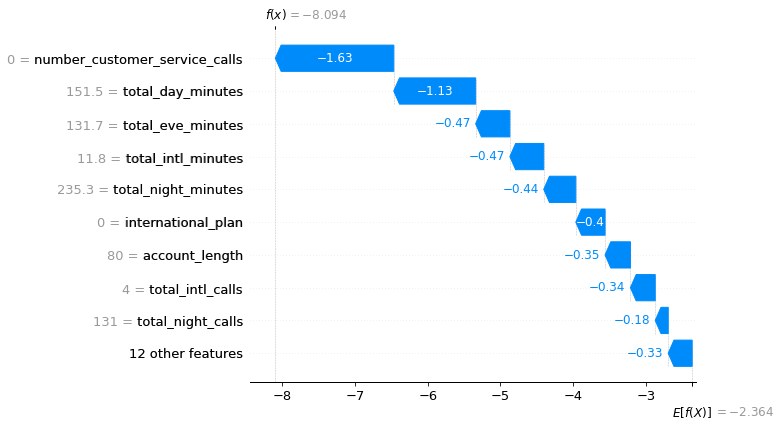

In [ ]:
shap.plots.waterfall(shap_values[3])

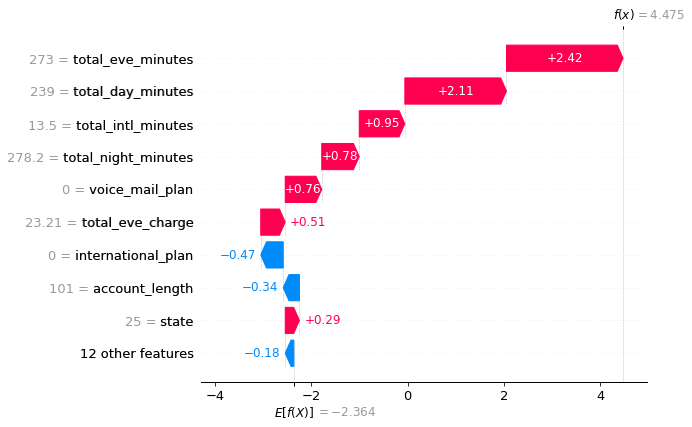

In [ ]:
shap.plots.waterfall(shap_values[6])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[3])

In [ ]:
shap.initjs()
shap.plots.force(shap_values)

# Proposta de desafio
** Partipação não obrigatória **

Melhorar o modelo atual que alcance ou passe o Recall de 92%. Atualmente esta em 74%, se chegar ou passar de 92% ganha uma nota 5.

Dicas:
Melhorar proporção de treino/teste
Melhorar feature Engineering
Tuning do Modelo
Mudar o algoritmo
Adicionar e/ou Excluir variáveis